<a href="https://colab.research.google.com/github/alfafimel/IPWK6-CORE/blob/master/IPWK6_CORE_LINEAR_REGRESSION_ELIZABETH_JOSEPHINE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the question

## **a) Specifying the Question**



> You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.A prediction result of a game between team 1  and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training). 
You have two possible approaches (polynomial and logistic approaches) given the datasets that will be provided

## **b) Defining the metrics for success**



> The objective for this data includes investigating whether or ot the game is friendly  while making the opredictions



## **c) Understanding the context**


> You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below. ---- Predict the result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).



## **d) Recording the Experimental Design**

1. reading in the datasets
2. checking the data for duplicates and missinng data
3. dropping of duplicates and removal filling in of missing data values with zero
4. Finding  and dealing with outliers, anomalies, and missing data within the dataset.
5. Performing of EDA recording of observations.
6. Implementing the solution by performing the respective analysis i.e. factor analysis, principal component analysis, and discriminant analysis.
8. Perform any necessary feature engineering 

9. Check of multicollinearity

10. Start building the model, Cross-validate the model

11. Compute RMSE

12. Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test

13. Perform appropriate regressions on the data including your justification

14. Challenge your solution by providing insights on how you can make improvements.

## **e) Relevance of the data**



> The data that was used for survey was obtained from an open datasource. this data is an aggregation by day of the number of goals scored and rankings of countries in the men's FIFA team. with it is a model that determines which team gets to be ranked where and how according to the years and goals.


# **Checking the data**

In [339]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
##

In [340]:
# reading datasets

data = pd.read_csv('fifa_ranking.csv')
data1 = pd.read_csv('results.csv')

In [341]:
data.rename(columns= {'country_full':'country'}, inplace = True)

In [342]:
# droppig unnecessary columns
to_drop = ['country_abrv', 'rank_date']
data.drop(to_drop, axis=1, inplace=True)

In [343]:
data.columns

Index(['rank', 'country', 'total_points', 'previous_points', 'rank_change',
       'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation'],
      dtype='object')

In [344]:
data.shape

(57793, 14)

In [345]:
# checking for duplicates
data.duplicated().any()

True

In [346]:
# drop all duplicates
data.drop_duplicates(inplace=True)

In [347]:
data.duplicated().sum()

0

In [348]:
# checking for null values
data.isnull().any()

rank                       False
country                    False
total_points               False
previous_points            False
rank_change                False
cur_year_avg               False
cur_year_avg_weighted      False
last_year_avg              False
last_year_avg_weighted     False
two_year_ago_avg           False
two_year_ago_weighted      False
three_year_ago_avg         False
three_year_ago_weighted    False
confederation              False
dtype: bool

In [349]:
# checking for duplicates
data1.duplicated().any()

False

In [350]:
# checking for null values
data1.isnull().any()

date          False
home_team     False
away_team     False
home_score    False
away_score    False
tournament    False
city          False
country       False
neutral       False
dtype: bool

In [351]:
#merging datasets
frames = [data, data1]
df = pd.concat(frames)
df

,rank,country,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,1.0,Germany,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Italy,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Switzerland,0.0,50.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,Sweden,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Argentina,0.0,51.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40834,NaN,Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-18,American Samoa,Tahiti,8.0,1.0,Pacific Games,Apia,True
40835,NaN,Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-18,Fiji,Solomon Islands,4.0,4.0,Pacific Games,Apia,True
40836,NaN,Egypt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-19,Senegal,Algeria,0.0,1.0,African Cup of Nations,Cairo,True
40837,NaN,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-19,Tajikistan,North Korea,0.0,1.0,Intercontinental Cup,Ahmedabad,True


In [352]:
df.head()

,rank,country,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,1.0,Germany,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Italy,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Switzerland,0.0,50.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,Sweden,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Argentina,0.0,51.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [353]:
df.isnull().any()

rank                        True
country                    False
total_points                True
previous_points             True
rank_change                 True
cur_year_avg                True
cur_year_avg_weighted       True
last_year_avg               True
last_year_avg_weighted      True
two_year_ago_avg            True
two_year_ago_weighted       True
three_year_ago_avg          True
three_year_ago_weighted     True
confederation               True
date                        True
home_team                   True
away_team                   True
home_score                  True
away_score                  True
tournament                  True
city                        True
neutral                     True
dtype: bool

In [354]:
# finding shape of the dataset
df.shape

(95228, 22)

In [355]:
# reading columns
df.columns

Index(['rank', 'country', 'total_points', 'previous_points', 'rank_change',
       'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'neutral'],
      dtype='object')

In [356]:
# finding shape of the dataset
df.shape

(95228, 22)

In [357]:
#previewing dataset
df.head()

,rank,country,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,1.0,Germany,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Italy,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Switzerland,0.0,50.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,Sweden,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Argentina,0.0,51.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [358]:
df.tail()

,rank,country,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral
40834,NaN,Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-18,American Samoa,Tahiti,8.0,1.0,Pacific Games,Apia,True
40835,NaN,Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-18,Fiji,Solomon Islands,4.0,4.0,Pacific Games,Apia,True
40836,NaN,Egypt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-19,Senegal,Algeria,0.0,1.0,African Cup of Nations,Cairo,True
40837,NaN,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-19,Tajikistan,North Korea,0.0,1.0,Intercontinental Cup,Ahmedabad,True
40838,NaN,Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-20,Papua New Guinea,Fiji,1.0,1.0,Pacific Games,Apia,True


In [359]:
df.sample(7)

,rank,country,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral
16232,112.0,Panama,0.00,382.0,2.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,CONCACAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
689,NaN,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1923-02-25,Belgium,France,4.0,1.0,Friendly,Forest,False
36762,NaN,Bulgaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-03-28,Bulgaria,Italy,2.0,2.0,UEFA Euro qualification,Sofia,False
31395,124.0,Barbados,0.00,359.0,-31.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,CONCACAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9001,NaN,Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1974-06-08,Austria,Italy,0.0,0.0,Friendly,Vienna,False
32554,41.0,Republic of Ireland,0.00,637.0,1.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43307,9.0,Colombia,1101.79,843.0,13.0,735.6,735.6,397.71,198.86,296.25,88.87,392.29,78.46,CONMEBOL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [360]:
# checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95228 entries, 0 to 40838
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     54389 non-null  float64
 1   country                  95228 non-null  object 
 2   total_points             54389 non-null  float64
 3   previous_points          54389 non-null  float64
 4   rank_change              54389 non-null  float64
 5   cur_year_avg             54389 non-null  float64
 6   cur_year_avg_weighted    54389 non-null  float64
 7   last_year_avg            54389 non-null  float64
 8   last_year_avg_weighted   54389 non-null  float64
 9   two_year_ago_avg         54389 non-null  float64
 10  two_year_ago_weighted    54389 non-null  float64
 11  three_year_ago_avg       54389 non-null  float64
 12  three_year_ago_weighted  54389 non-null  float64
 13  confederation            54389 non-null  object 
 14  date                  

In [361]:
# checking for duplicates
df.duplicated().any()

False

In [362]:
# drop all duplicates
df.drop_duplicates(inplace=True)

In [363]:
df.duplicated().sum()

0

In [364]:
# checking for null values
df.isnull().any()

rank                        True
country                    False
total_points                True
previous_points             True
rank_change                 True
cur_year_avg                True
cur_year_avg_weighted       True
last_year_avg               True
last_year_avg_weighted      True
two_year_ago_avg            True
two_year_ago_weighted       True
three_year_ago_avg          True
three_year_ago_weighted     True
confederation               True
date                        True
home_team                   True
away_team                   True
home_score                  True
away_score                  True
tournament                  True
city                        True
neutral                     True
dtype: bool

In [365]:
# filling null values with zero
df.fillna(0, inplace=True)

In [366]:
# Dealing with the Missing Data
df.isnull().sum()

rank                       0
country                    0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
date                       0
home_team                  0
away_team                  0
home_score                 0
away_score                 0
tournament                 0
city                       0
neutral                    0
dtype: int64

In [367]:
# dealing with outliers
# quantiles
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range and stores the result in the data frame 'df_out'
# ---
# 
df1 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
# ---
# 
print(df1.shape)

# Printing the shape of our old dataset
# ---
#
print(df.shape)

(34520, 22)
(95228, 22)


In [368]:
# top football confederations
print('Total number of confederations: {0}'.format(df1['confederation'].nunique()))
print(df1['confederation'].value_counts().head(10))
print('--'*40)

Total number of confederations: 7
0           26356
CAF          2054
UEFA         2035
AFC          1759
CONCACAF     1434
OFC           470
CONMEBOL      412
Name: confederation, dtype: int64
--------------------------------------------------------------------------------


# **EXPLORATORY DATA ANALYSIS**

## **Univariate analysis**

Text(0.5, 1.0, 'Distribution of countries per their homescores')

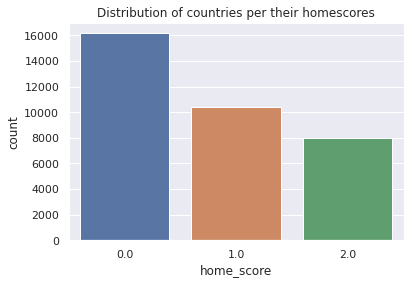

In [369]:
#Histogram of the ome scores of different countries
ax = sns.countplot(df1['home_score'], order = df1['home_score'].value_counts().index)
plt.title('Distribution of countries per their homescores')

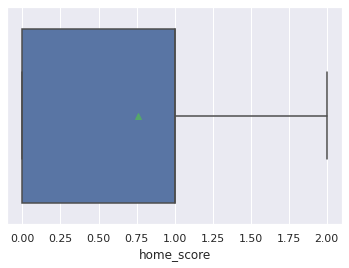

In [370]:
## boxplot
sns.boxplot(df1['home_score'], showmeans=True)

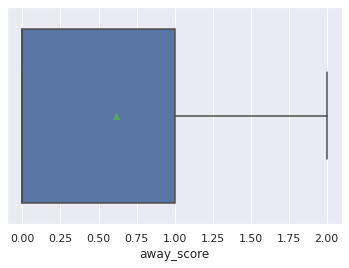

In [371]:
sns.boxplot(df1['away_score'], showmeans=True)

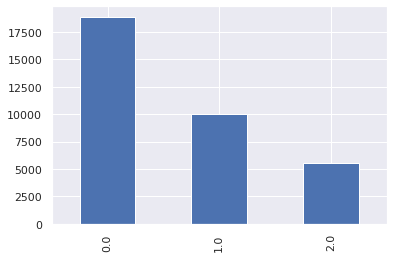

In [372]:
df1['away_score'].value_counts().sort_index().plot.bar()

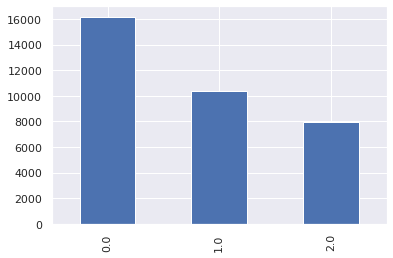

In [373]:
df1['home_score'].value_counts().sort_index().plot.bar()

In [374]:
print(df1.skew())

rank                       2.033130
total_points               0.000000
previous_points            2.654479
rank_change                0.000000
cur_year_avg               0.000000
cur_year_avg_weighted      0.000000
last_year_avg              0.000000
last_year_avg_weighted     0.000000
two_year_ago_avg           0.000000
two_year_ago_weighted      0.000000
three_year_ago_avg         0.000000
three_year_ago_weighted    0.000000
home_score                 0.454146
away_score                 0.761499
neutral                    1.599769
dtype: float64


In [375]:
print(df1.kurt())

rank                       2.643261
total_points               0.000000
previous_points            6.012138
rank_change                0.000000
cur_year_avg               0.000000
cur_year_avg_weighted      0.000000
last_year_avg              0.000000
last_year_avg_weighted     0.000000
two_year_ago_avg           0.000000
two_year_ago_weighted      0.000000
three_year_ago_avg         0.000000
three_year_ago_weighted    0.000000
home_score                -1.304573
away_score                -0.833384
neutral                    0.559292
dtype: float64


In [376]:
df1.columns

Index(['rank', 'country', 'total_points', 'previous_points', 'rank_change',
       'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'neutral'],
      dtype='object')

In [377]:
to_drop = ['rank_change',
       'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted']
df1.drop(to_drop, axis=1, inplace=True)

In [378]:
df1.shape

(34520, 13)

## **Bivariate analysis**

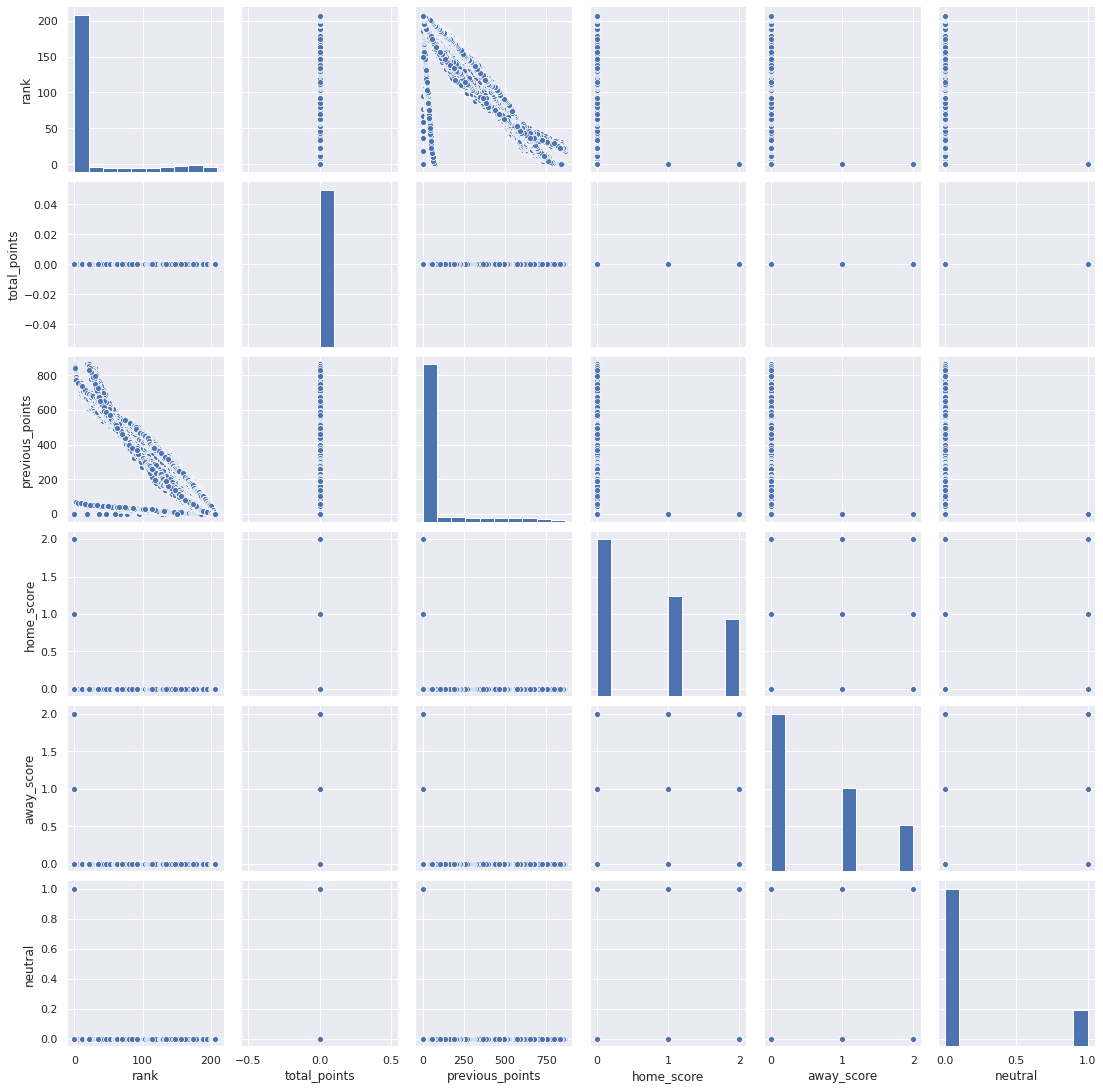

In [379]:
# Ploting the bivariate summaries and recording our observations
# scatterplot
sns.pairplot(df1)
plt.show()

In [380]:
# Calculating the pearson coefficient
pearson_coeff = df1["home_score"].corr(df1["away_score"], method="pearson") 
print(pearson_coeff)

# Checking whether you have to define the pearson
coeff = df1["home_score"].corr(df1["away_score"])
print(coeff)

0.23873779888274616
0.23873779888274616


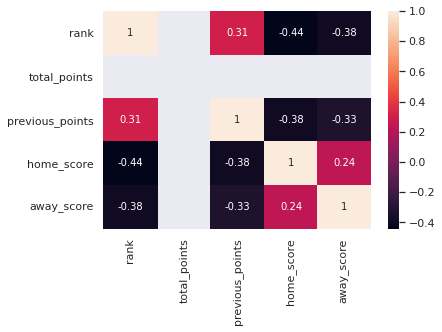

In [381]:
# heatmap
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [382]:
df1.sample(6)

,rank,country,total_points,previous_points,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral
11437,0.0,Argentina,0.0,0.0,0,1980-10-15,Argentina,Czechoslovakia,1.0,0.0,Friendly,Buenos Aires,False
15432,0.0,Barbados,0.0,0.0,0,1989-04-14,Barbados,Bermuda,2.0,1.0,Friendly,Bridgetown,False
36137,0.0,Rwanda,0.0,0.0,0,2014-07-12,Rwanda,Gabon,1.0,0.0,Friendly,Kigali,False
21106,0.0,Antigua and Barbuda,0.0,0.0,0,1998-02-22,Antigua and Barbuda,Dominica,1.0,1.0,Friendly,St. John's,False
14990,88.0,Senegal,0.0,451.0,CAF,0,0,0,0.0,0.0,0,0,0
39913,0.0,Russia,0.0,0.0,0,2018-07-01,Croatia,Denmark,1.0,1.0,FIFA World Cup,Nizhny Novgorod,True


In [383]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34520 entries, 0 to 40838
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             34520 non-null  float64
 1   country          34520 non-null  object 
 2   total_points     34520 non-null  float64
 3   previous_points  34520 non-null  float64
 4   confederation    34520 non-null  object 
 5   date             34520 non-null  object 
 6   home_team        34520 non-null  object 
 7   away_team        34520 non-null  object 
 8   home_score       34520 non-null  float64
 9   away_score       34520 non-null  float64
 10  tournament       34520 non-null  object 
 11  city             34520 non-null  object 
 12  neutral          34520 non-null  object 
dtypes: float64(5), object(8)
memory usage: 4.9+ MB


In [384]:
df1['home_score'].corr(df1['away_score'])

0.23873779888274616

Text(0.5, 1.0, 'home_score vs away_score')

<Figure size 864x720 with 0 Axes>

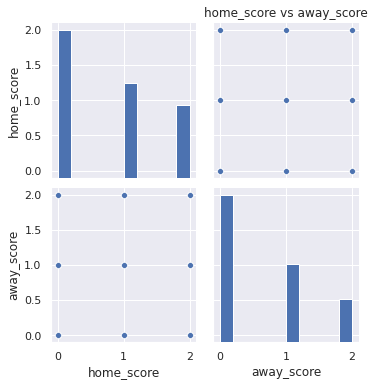

In [385]:
# Determine correlation between numeric features
plt.figure(figsize=(12,10))
sns.pairplot(df1[['home_score','away_score']])
plt.title('home_score vs away_score')

## **Multivariate analysis**

### **Factor analysis**

In [386]:
# Installing factor analyzer 
!pip install factor_analyzer==0.2.3
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

#The p vlaue is 0 the observed matrix is not an identity matrix.

(12997144.610679293, 0.0)

### **Principal component analysis**

In [387]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df1[['home_score','away_score']])
scaled_data = scaler.transform(df1[['home_score','away_score']])

In [388]:
scaled_data = pd.DataFrame(scaled_data)

In [389]:
df2 = scaled_data.fillna(0)
df2.head()

,0,1
0,-0.950755,-0.821526
1,-0.950755,-0.821526
2,-0.950755,-0.821526
3,-0.950755,-0.821526
4,-0.950755,-0.821526


In [390]:
from sklearn.decomposition import PCA
logmodel = PCA(n_components=2)
logmodel.fit(df2)
pca_x = logmodel.transform(df2)

In [391]:
pca_x.shape

(34520, 2)

In [392]:
df3 = pd.DataFrame(logmodel.components_, columns = ['home_score','away_score'])

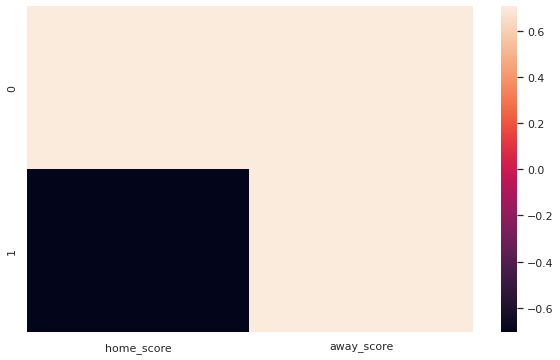

In [393]:
plt.figure(figsize=(10,6))
sns.heatmap(df3)

Text(0.5, 0, 'First Principle Component ')

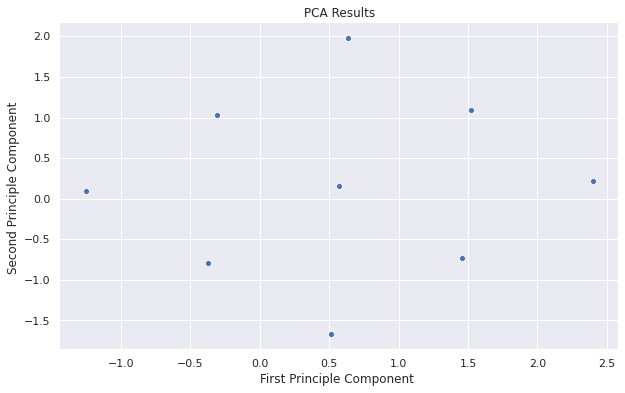

In [394]:
plt.figure(figsize=(10,6))
ty=sns.scatterplot(pca_x[:,0], pca_x[:,1])
sns.despine(left=True)
ty.set_title('PCA Results')
ty.set_ylabel('Second Principle Component ')
ty.set_xlabel('First Principle Component ')

In [395]:
pca_x

array([[-1.25319172,  0.0913784 ],
       [-1.25319172,  0.0913784 ],
       [-1.25319172,  0.0913784 ],
       ...,
       [-0.3083254 ,  1.03624472],
       [-0.3083254 ,  1.03624472],
       [ 0.57347718,  0.15444214]])

# **Polynomial Regression Analysis**

In [396]:
#Import libaries
import datetime
import operator
import matplotlib.pyplot as plt
from ipywidgets import interact
from IPython.display import Markdown as md
from datetime import date, timedelta, datetime
from numpy import sqrt
from pandas import read_csv, to_datetime
from prettytable import PrettyTable
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

In [398]:
df1.shape

(34520, 13)

In [284]:
df1.dtypes

rank                       float64
total_points               float64
previous_points            float64
rank_change                float64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
date                        object
home_team                   object
away_team                   object
home_score                 float64
away_score                 float64
tournament                  object
city                        object
country                     object
neutral                     object
dtype: object

In [301]:
df5 = df1
df5.head()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1.0,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,0,0,0,0.0,0.0,0,0,0,0
1,2.0,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,0,0,0,0.0,0.0,0,0,0,0
3,4.0,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,0,0,0,0.0,0.0,0,0,0,0
5,6.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,0,0,0,0.0,0.0,0,0,0,0
19,20.0,0.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,0,0,0,0.0,0.0,0,0,0,0


In [286]:
df5.columns

Index(['rank', 'total_points', 'previous_points', 'rank_change',
       'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [302]:
# droppig unnecessary columns
to_drop = ['total_points', 'previous_points', 'rank_change',
       'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation', 
       'tournament', 'city', 'country', 'neutral',]
df5.drop(to_drop, axis=1, inplace=True)

In [288]:
print(df5)

#Get the 2 and the last column from the dataset 
X = df5.iloc[:, 1:2].values
y = df5.iloc[:, 2].values
print(X)
print(y)

       rank  home_score  away_score
0       1.0         0.0         0.0
1       2.0         0.0         0.0
3       4.0         0.0         0.0
5       6.0         0.0         0.0
19     20.0         0.0         0.0
...     ...         ...         ...
40829   0.0         1.0         1.0
40830   0.0         0.0         1.0
40836   0.0         0.0         1.0
40837   0.0         0.0         1.0
40838   0.0         1.0         1.0

[34005 rows x 3 columns]
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [1.]]
[0. 0. 0. ... 1. 1. 1.]


In [289]:
# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [290]:
# Fit Linear Regression model to the dataset(this is optional. We are doing this for the sole purpose of comparing the linear regression model to the polynomial regression model)
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [291]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg2=PolynomialFeatures(degree=2)
X_poly=poly_reg2.fit_transform(X)
lin_reg_2=LinearRegression()
lin_reg_2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [292]:
poly_reg3=PolynomialFeatures(degree=3)
X_poly3=poly_reg3.fit_transform(X)
lin_reg_3=LinearRegression()
lin_reg_3.fit(X_poly3,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

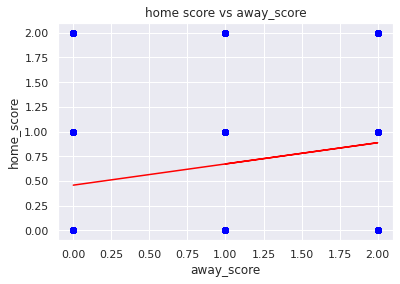

In [293]:
# Visualize the Linear Regression results
plt.scatter(X, y, color='blue')
plt.plot(X, lin_reg.predict(X), color='red')
plt.title('home score vs away_score')
plt.xlabel('away_score')
plt.ylabel('home_score')
plt.show()


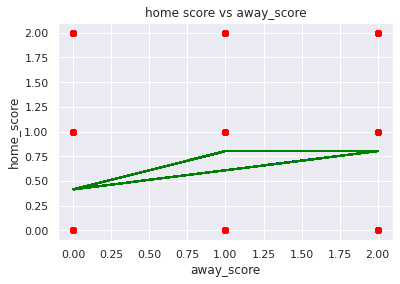

In [294]:
# Visualize the polynomial Regression results
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg_2.predict(poly_reg2.fit_transform(X)),color='blue')
plt.plot(X,lin_reg_3.predict(poly_reg3.fit_transform(X)),color='green')
plt.title('home score vs away_score')
plt.xlabel('away_score')
plt.ylabel('home_score')
plt.show()

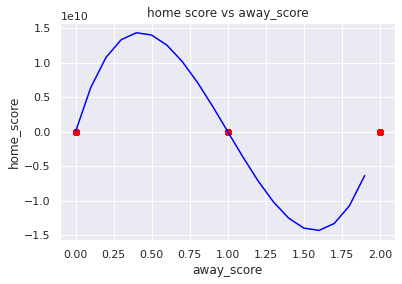

In [295]:
X_grid=np.arange(min(X),max(X),0.1) # This will give us a vector.We will have to convert this into a matrix 
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X,y,color='red')
plt.plot(X_grid,lin_reg_3.predict(poly_reg3.fit_transform(X_grid)),color='blue')
#plt.plot(X,lin_reg_3.predict(poly_reg3.fit_transform(X)),color='green')
plt.title('home score vs away_score')
plt.xlabel('away_score')
plt.ylabel('home_score')
plt.show()

In [296]:
# converting datatypes

In [297]:
# Model 1: Predict how many goals the home team scores.

In [298]:
# Approach 1: Polynomial approach

#What to train given:

#Rank of home team

#Rank of away team

#Tournament type

#Model 1: Predict how many goals the home team scores.

#Model 2: Predict how many goals the away team scores.

In [299]:
#Model 2: Predict how many goals the away team scores.


> Indented block

> Indented block

Approach 1: Polynomial approach

What to train given:

Rank of home team

Rank of away team

Tournament type

Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.



> Indented block

> Indented block




Polynomial Regression Analysis

> Indented block

> Indented block




5.0 Pts

**Excellent** 

The students exhaustively perform 

polynomial regression by 

performing feature engineering where necessary, 

checking multicollinearity, 

building an optimal model, 

cross validate the model, 

compute the RMSE of the model and 

finally assess the heteroscedasticity.

# **Logistics Regression Analysis**

Logistic Regression
5.0 Pts

**Excellent**

The students exhaustively perform Logistic regression by 

performing feature engineering where necessary, 

Training an optimal classifier, 

Interpret the result obtained and 

make a suitable prediction. 

The students should also challenge their solution by 

providing insights on how you can make improvements.

# **Discriminant Analysis**

In [191]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from tqdm import tqdm_notebook

import warnings
warnings.filterwarnings('ignore')

In [188]:
df4 = df1.fillna(0)
df4.shape

(34005, 13)

In [192]:
X = df4.iloc[:, 0:4].values
y = df4.iloc[:2, ].values

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y)
X_test = lda.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

# **Expected flow for the assessment:**

Perform your EDA

Perform any necessary feature engineering 

Check of multicollinearity

Start building the model

Cross-validate the model

Compute RMSE

Create residual plots for your models, 

and assess their heteroscedasticity using Bartlett’s test

Perform appropriate regressions on the data including your justification

Challenge your solution by providing insights on how you can make improvements.